Used DBSCAN and KMeans clustering on iris dataset

DBSCAN 
eps = 0.45 , silhouette score = 18%
eps = 0.4  , silhouette score = 2%
eps = 0.8  , silhouette score = 52%
eps = 1    , silhouette score = 53%

KMeans
k=3  , silhouette score =   45%


In [151]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score




In [152]:
iris  = sns.load_dataset('iris')
iris.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [153]:
iris.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [154]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [155]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [156]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [157]:
iris1 = iris.drop(['species'], axis=1)
iris1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [158]:
iris2 = iris.copy()
iris2.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [159]:
iris3 = iris.copy()
iris3.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [160]:
sscaler = StandardScaler()
iris_sscaled = sscaler.fit_transform(iris1.iloc[:,:])
iris_sscaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### EPS = 0.45

In [161]:
dbscan = DBSCAN(eps=0.45,min_samples=5)
dbscan.fit(iris_sscaled)
dbscan

DBSCAN(eps=0.45)

In [162]:
# divided data into 3 clusters 0,1,2
# -1 is noise ie. outlier
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        2,  2,  2, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1,  2, -1, -1,
       -1,  2, -1, -1, -1,  2, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  2, -1,  2,  2,  2, -1,  2,  2,  2, -1,  2, -1, -1],
      dtype=int64)

In [163]:
iris['Clusters'] = dbscan.labels_
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,-1
9,4.9,3.1,1.5,0.1,setosa,0


In [164]:
# we can see here that more than 20% of data is coming in each cluster\
# so we need to reduce the value of epsilon and check again for silhoutte score
iris.value_counts('Clusters')

Clusters
-1    54
 0    41
 1    40
 2    15
dtype: int64

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

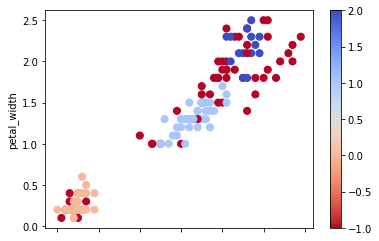

In [165]:
#scatter plot for 2 variables
# coolwarm_r will display warm colors first and then cool colors
# overlap of some clusters is appearing
iris.plot(x="petal_length",y="petal_width", kind='scatter', c=dbscan.labels_, cmap=plt.cm.coolwarm_r, s=50)

In [166]:
silhouette_score(iris_sscaled, dbscan.labels_)

0.18059754653658136

### EPS= 0.4

In [167]:
dbscan1 = DBSCAN(eps=0.4,min_samples=5)
dbscan1.fit(iris_sscaled)
dbscan1

dbscan1.labels_

array([ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  1,  3,  1,  3, -1, -1,  1, -1, -1,  2, -1,  2,  3,  1,  3,  3,
       -1,  3, -1,  2, -1,  2,  1,  1,  1,  1,  2,  3,  3,  3,  3, -1, -1,
       -1,  1, -1,  3,  3,  3,  2,  3, -1,  3,  3,  3,  2, -1,  3, -1, -1,
       -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1,
       -1,  5, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  4, -1, -1,  5,  5, -1,  5,  5,  5, -1,  4, -1, -1],
      dtype=int64)

In [168]:
iris2["Clusters"] = dbscan1.labels_
iris2.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0


In [169]:
# 20% of 150 observations r 30 
iris2.value_counts('Clusters')

Clusters
-1    66
 0    39
 3    18
 1     9
 2     7
 5     7
 4     4
dtype: int64

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

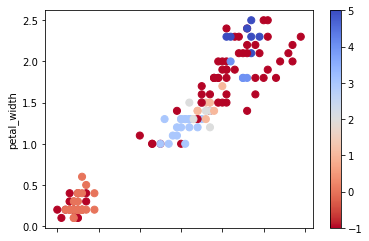

In [170]:
#scatter plot for 2 variables
# coolwarm_r will display warm colors first and then cool colors
# overlap of some clusters is appearing
# s=50 is the size of the circles
iris2.plot(x="petal_length",y="petal_width", kind='scatter', c=dbscan1.labels_, cmap=plt.cm.coolwarm_r, s=50)

In [171]:
silhouette_score(iris_sscaled, dbscan1.labels_)

0.027670001694674772

### EPS = 0.8

In [172]:
dbscan2 = DBSCAN(eps=0.8,min_samples=5)
dbscan2.fit(iris_sscaled)
dbscan2

#dbscan2.labels_

iris2["EPS_1_Clusters"] = dbscan2.labels_
iris2.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters,EPS_1_Clusters
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0


In [173]:
iris2.value_counts('EPS_1_Clusters')

EPS_1_Clusters
 1    97
 0    49
-1     4
dtype: int64

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

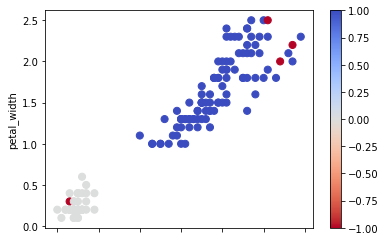

In [174]:
iris2.plot(x="petal_length",y="petal_width", kind='scatter', c=dbscan2.labels_, cmap=plt.cm.coolwarm_r, s=50)

In [175]:
silhouette_score(iris_sscaled, dbscan2.labels_)

0.5216965052515835

### EPS = 1

In [176]:
dbscan3 = DBSCAN(eps=1,min_samples=5)
dbscan3.fit(iris_sscaled)
dbscan3
#dbscan2.labels_

iris2["EPS_2_Clusters"] = dbscan3.labels_
#iris2.head(4)

iris2.value_counts('EPS_2_Clusters')

EPS_2_Clusters
 1    98
 0    49
-1     3
dtype: int64

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

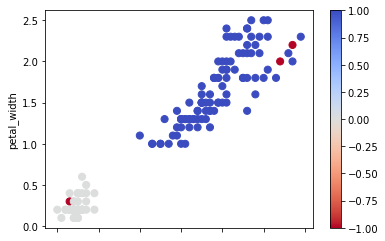

In [177]:
iris2.plot(x="petal_length",y="petal_width", kind='scatter', c=dbscan3.labels_, cmap=plt.cm.coolwarm_r, s=50)

In [178]:
silhouette_score(iris_sscaled, dbscan3.labels_)

0.5382884306788227

### Using k- means clustering

In [179]:
from sklearn.cluster import KMeans

kmean_model = KMeans(n_clusters=3)
kmean_model.fit(iris_sscaled)

KMeans(n_clusters=3)

In [180]:
kmean_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [181]:
iris['kmean_clusters'] = kmean_model.labels_
iris.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters,kmean_clusters
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1
5,5.4,3.9,1.7,0.4,setosa,0,1


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

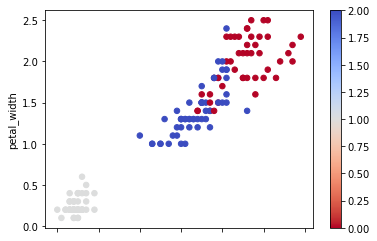

In [182]:
#scatter plot for 2 variables
# coolwarm_r will display warm colors first and then cool colors
# here distinct clusters can be seen
# s=50 is the size of the circles
iris.plot(x="petal_length",y="petal_width", kind='scatter', c=kmean_model.labels_, cmap=plt.cm.coolwarm_r, s=30)

In [183]:
silhouette_score(iris_sscaled, kmean_model.labels_)

0.45994823920518646